# DataFest 2021: Python Data Analysis

Brian S. Cole, PhD

Harvard Medical School


## Goals:

### 1) Read in DataFrame

### 2) Inspect dataset

### 3) Fit a predictive model with sklearn

### 4) Compare 2 models with held-out data

### 5) Compare many models with cross validation

### 6) Tune winning model with grid search

In [1]:
import sklearn

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
sns.set_context('poster')  # Increase font size.

In [3]:
# 1. Read in data:

us_cases = pd.read_csv('datafest-project-master/data_py/US_cases_long_demogr_week.csv',
                       index_col=0)



In [4]:
# 2. Inspect data:

us_cases.head()

,state,week_of_year,pop_count_2019,percent_age65over,percent_female,percent_white,percent_black,cases_cum,cases_cum_rate_100K,cases_count_pos,cases_rate_100K
0,Alabama,4,4903185,17.332346,51.673922,69.126415,26.784447,0,0.0,0.0,0.0
1,Alabama,5,4903185,17.332346,51.673922,69.126415,26.784447,0,0.0,0.0,0.0
2,Alabama,6,4903185,17.332346,51.673922,69.126415,26.784447,0,0.0,0.0,0.0
3,Alabama,7,4903185,17.332346,51.673922,69.126415,26.784447,0,0.0,0.0,0.0
4,Alabama,8,4903185,17.332346,51.673922,69.126415,26.784447,0,0.0,0.0,0.0


In [5]:
# Pandas DataFrames have a .shape() method that gives the column and row count:

us_cases.shape  # Many weeks worth of data.  Let's focus on the most recent week.

(2295, 11)

In [6]:
# Subset just the most recent week using a DataFrame slice:

us_cases_latest_week = us_cases[us_cases.week_of_year == max(us_cases.week_of_year)]

# After the slice, set the index back to 'state':
us_cases_latest_week.set_index('state', inplace=True)

# Now what's the shape of the data?
us_cases_latest_week.shape

# Now we have 10 columns for 51 states plus DC.

(51, 10)

In [7]:
# Let's look at the first 5 rows of the new DataFrame:

us_cases_latest_week.head()

,week_of_year,pop_count_2019,percent_age65over,percent_female,percent_white,percent_black,cases_cum,cases_cum_rate_100K,cases_count_pos,cases_rate_100K
state,,,,,,,,,,
Alabama,48,4903185,17.332346,51.673922,69.126415,26.784447,1687316,34412.652184,14723.0,300.274210
Alaska,48,731545,12.519804,47.861307,65.271173,3.705582,209949,28699.396483,4267.0,583.286059
Arizona,48,7278717,17.978897,50.303096,82.616785,5.179443,2204648,30288.964388,26297.0,361.286199
Arkansas,48,3017804,17.359709,50.904167,79.039527,15.675239,1062354,35202.882626,11074.0,366.955574
California,48,39512223,14.775466,50.281577,71.939104,6.460677,8251482,20883.365636,100844.0,255.222289


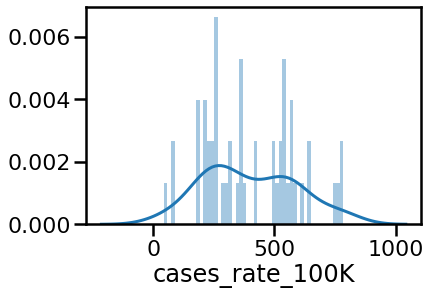

In [8]:
# Look at the distribution of the variable we are trying to predict,
# 'cases_rate_100K'

sns.distplot(us_cases_latest_week['cases_rate_100K'], bins=50)

In [9]:
# 3: Fit a predictive model.

# Let's try to predict case rate from other demographic variables.

# Define X matrix of predictors and y vector of outcomes:

X = us_cases_latest_week[['percent_age65over', 'percent_female', 'percent_white', 'percent_black']]

# Add a variable that shouldn't affect the case rate: the length of the state's name:
X = X.assign(state_name_length = list(map(lambda s: len(s), X.index)))

X.sort_values('percent_age65over')

,percent_age65over,percent_female,percent_white,percent_black,state_name_length
state,,,,,
Utah,11.412252,49.627631,90.585466,1.482771,4
District of Columbia,12.375930,52.573649,45.990997,45.977253,20
Alaska,12.519804,47.861307,65.271173,3.705582,6
Texas,12.878481,50.328455,78.652999,12.895697,5
Georgia,14.287403,51.396643,60.198270,32.570493,7
Colorado,14.628418,49.618319,86.939426,4.592657,8
California,14.775466,50.281577,71.939104,6.460677,10
North Dakota,15.726411,48.818863,86.942401,3.409696,12
Maryland,15.869116,51.554416,58.545011,31.074172,8


In [10]:
# Define y value: independent variable that we want to predict

y = us_cases_latest_week['cases_rate_100K']

In [11]:
# Now we can train a supervised ML model to predict the y vector from the X matrix.

# It's important to hold out some test data to evalute the predictive power of a fit ML model.

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# These 4 variables get assigned to the partitions of the full X matrix and y vector.

In [12]:
# These states were randomly selected to be training data - the index is the 'state':

X_train.index  

Index(['North Carolina', 'Maine', 'West Virginia', 'Iowa', 'Florida', 'Kansas',
       'Montana', 'Utah', 'Missouri', 'Hawaii', 'Alabama', 'Vermont',
       'Nebraska', 'North Dakota', 'Colorado', 'New Hampshire', 'Oregon',
       'Alaska', 'Massachusetts', 'Arizona', 'Rhode Island', 'Ohio',
       'Minnesota', 'South Dakota', 'Georgia', 'Michigan', 'Louisiana',
       'Wyoming', 'Maryland', 'Delaware', 'Tennessee', 'Indiana', 'Nevada',
       'Pennsylvania'],
      dtype='object', name='state')

In [13]:
# And these states were randomly selected to be held-out test data:

X_test.index

Index(['Texas', 'South Carolina', 'Virginia', 'Idaho', 'Mississippi',
       'New Mexico', 'Kentucky', 'New York', 'Arkansas', 'New Jersey',
       'Illinois', 'District of Columbia', 'Wisconsin', 'Connecticut',
       'Washington', 'California', 'Oklahoma'],
      dtype='object', name='state')

## Fitting a supervised ML model - the sklearn API

In [14]:
# Now we can train a supervised ML model to predict case rate on the training data.

# ScikitLearn has a unified API that allows us to fit all models the same way.

from sklearn.linear_model import LinearRegression

linear_regression_model = LinearRegression()  # First, you instantiate the model object via its constructor.

# It's common to instantiate the model's object and fit it in one line:

reg = LinearRegression().fit(X_train, y_train)  # Every sklearn model has a fit method.

In [15]:
# Now we can use the trained model to predict the case rate of the held-out test data:

reg_y_pred = reg.predict(X_test)

Text(0.5, 1.0, 'LinearRegression')

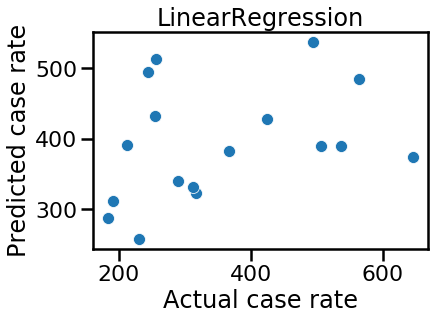

In [16]:
# So how close are they?

pred_vs_true_scatterplot = sns.scatterplot(y_test, reg_y_pred)
pred_vs_true_scatterplot.set(xlabel="Actual case rate", ylabel="Predicted case rate")
pred_vs_true_scatterplot.set_title("LinearRegression")

In [17]:
# Which states does the model underpredict?

pd.DataFrame(data={'y_true': y_test,
                   'y_pred': reg_y_pred,
                   'residual': reg_y_pred - y_test}).sort_values(by='residual')

,y_true,y_pred,residual
state,,,
New Mexico,644.830837,374.521046,-270.309792
Oklahoma,536.142418,389.864867,-146.277551
Illinois,505.728419,390.070324,-115.658095
Wisconsin,563.613087,484.876708,-78.736379
Kentucky,423.979105,428.623558,4.644453
New Jersey,316.633623,323.639570,7.005947
Arkansas,366.955574,383.085365,16.129791
Connecticut,311.671964,331.616357,19.944394
New York,231.140201,257.285846,26.145645


In [18]:
# It's important to use metrics to evaluate a model.
# For regression prolems, MSE isn't bad.

# sklearn has a metrics package with utility functions like mean_squared_error():
from sklearn.metrics import mean_squared_error

# Use mean_squared_error to measure the error of the trained linear model:
reg_mse = mean_squared_error(y_test, reg_y_pred)
reg_mse

# What does that MSE value mean?
# How does it compare to other models?

19852.164473796758

## Comparing two models: Mean Squared Error

Text(0.5, 1.0, 'GradientBoostingRegressor')

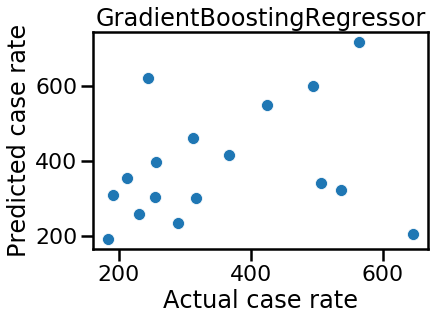

In [19]:
# 4: Compare 2 models

# Can other regression models from sklearn do better than LinearRegression?

# Let's try GradientBoostingRegressor from sklearn.ensemble which is a complicated ML method:
from sklearn.ensemble import GradientBoostingRegressor

# Notice the same syntax is used to fit any sklearn model:
gbr = GradientBoostingRegressor().fit(X_train, y_train)

# And predicting the held-out X_test data also:
gbr_y_pred = gbr.predict(X_test)


# Investigate the difference between this new set of predicted case rates
# and the actual case rate of the held-out data:
gbr_pred_vs_true_scatterplot = sns.scatterplot(y_test, gbr_y_pred)
gbr_pred_vs_true_scatterplot.set(xlabel="Actual case rate", ylabel="Predicted case rate")
gbr_pred_vs_true_scatterplot.set_title("GradientBoostingRegressor")

In [20]:
# Is the mean squared error of the GradientBoostingRegressor better
# or worse than LinearRegression?

gbr_mse = mean_squared_error(y_test, gbr_y_pred)
gbr_mse

31909.186785904163

In [21]:
# So the GradientBoostingRegressor is worse.
# Let's systematically compare a few models.

# For convenience, declare a dictionary with a few models:

supervised_model_classes = {"Random Forest": sklearn.ensemble.RandomForestRegressor,
                            "Linear Model": sklearn.linear_model.LinearRegression,
                            "SVM": sklearn.svm.SVR,
                            "Dummy": sklearn.dummy.DummyRegressor}

# Now iterate through the models and fit and evaluate them.
# This highlights the utility of the unified syntax:

for model_name, model_class in supervised_model_classes.items():
    fit_model = model_class().fit(X_train, y_train)
    y_pred = fit_model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    print(f"{model_name}\t{mse}")

Random Forest	24889.79856325415
Linear Model	19852.164473796758
SVM	21312.40498271192
Dummy	24427.485592057412


## Cross-validation: more robust model evaluation

In [22]:
# Now what about the fact that we only did a train-test split once?
# Different partitions of training and testing data will result in different MSE.

# Cross-validation is a more robust strategy that partitions the entire dataset into K folds
# then trains on K-1 folds to predict the remaining fold.
# This is repeated for each fold, so that all data are held out exactly once.

# ScikitLearn has a convenience function called cross_val_score():
from sklearn.model_selection import cross_val_score

# Let's repeat the above loop but use cross-validation to assess each model.

# This time, I'll save the mean MSE from cross-validation into a dictionary:
mses_by_model_class = dict()

# You have to make a scoring function from the mean_squared_error for CV:
mse_scorer = sklearn.metrics.make_scorer(mean_squared_error)

for model_name, ModelClass in supervised_model_classes.items():
    model_object = ModelClass()  # Need to instantiate the model
    cv_mses = cross_val_score(model_object, X, y, cv=5, scoring=mse_scorer)
    mses_by_model_class[model_name] = cv_mses.mean()

In [23]:
mses_by_model_class  # RandomForest is now the best model!  SVM is worse than the DummyRegressor.

{'Random Forest': 22614.263903548985,
 'Linear Model': 24950.634779072985,
 'SVM': 38050.83158918264,
 'Dummy': 36624.17052807201}

## Model tuning with cross-validation

In [24]:
# Many models have "hyperparameters" which affect the learning algorithm.
# Tuning these hyperparameters is a commonplace activity in data science,
# but a key danger exists: overfitting the model's hyperparameters to a given training dataset.
# Cross validation can help, just like with model comparison.

# ScikitLearn has a GridSearchCV class to help:
from sklearn.model_selection import GridSearchCV

# You can define a grid of hyperparameters to try, and GridSearch will try every combination.
# This can help you identify a good set of hyperparameters for your particular project.

In [25]:
# Which hyperparameters can be set in RandomForestRegressor?

??sklearn.ensemble.RandomForestRegressor

In [26]:
# Let's try a simple grid - the number of trees in the forest,
# and the minimum number of samples to split a leaf during tree induction.

# The hyperparameter grid is just a dictionary whose keys
# are the hyperparameter's name (the kwarg to the model's constructor)
# and whose values are a list of hyperparameters to try:

rf_param_grid = {'n_estimators': [10, 30, 100],
                 'min_samples_split': [2, 3],
                 'random_state': [42],
                }


# Instantiate the GridSearchCV object with an object from the model class you want to tune
# and the hyperparameter grid to search:

rf_grid_search_cv = GridSearchCV(sklearn.ensemble.RandomForestRegressor(),
                                rf_param_grid, scoring=mse_scorer, cv=5)


# Now this new object can be fit with the same scikit-learn methods as a normal model:

rf_grid_search_cv.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [27]:
# Now the fit GridSearchCV object has attributes for the best hyperparameter:

rf_grid_search_cv.best_params_

{'min_samples_split': 3, 'n_estimators': 100, 'random_state': 42}

In [28]:
# The GridSearchCV object also has the predict() method and this
# automatically uses the best hyperparameters:


tuned_rf_y_pred = rf_grid_search_cv.predict(X_test)


Text(0.5, 1.0, 'Tuned RandomForestRegressor')

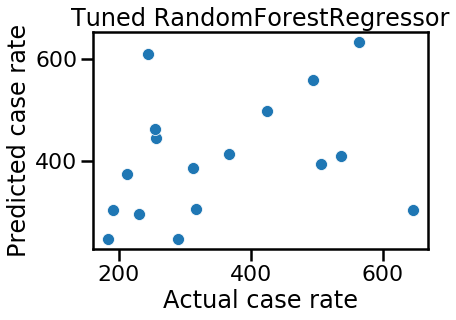

In [29]:
rf_pred_vs_true_scatterplot = sns.scatterplot(y_test, tuned_rf_y_pred)
rf_pred_vs_true_scatterplot.set(xlabel="Actual case rate", ylabel="Predicted case rate")
rf_pred_vs_true_scatterplot.set_title("Tuned RandomForestRegressor")

In [30]:
# Comparing models - let's update the existing "mses_by_model_class" dict:

mses_by_model_class['Tuned Random Forest'] = cross_val_score(rf_grid_search_cv.best_estimator_,
                                                             X, y, cv=5, scoring=mse_scorer).mean()

mses_by_model_class

{'Random Forest': 22614.263903548985,
 'Linear Model': 24950.634779072985,
 'SVM': 38050.83158918264,
 'Dummy': 36624.17052807201,
 'Tuned Random Forest': 22499.562816206097}

Text(0.5, 0, 'MSE')

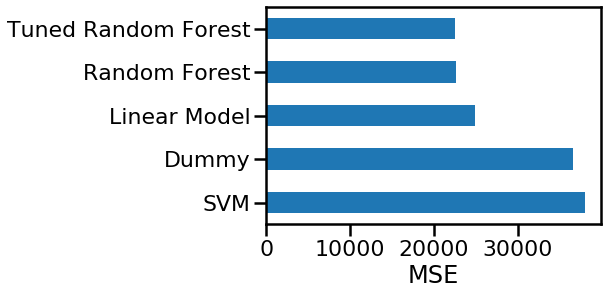

In [31]:
# A quick way to get a barplot is by using the plot() method from pandas objects.
# In this case, we'll use a Series instead of a DataFrame because this just a vector (1 dimension):

mse_barplot = pd.Series(mses_by_model_class).sort_values(ascending=False).plot(kind='barh')
mse_barplot.set_xlabel('MSE')